# Classification des sentiments
### SOYKOK Aylin 28711545 - CELIK Simay 28713301
## Machine Learning 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from collections import Counter
from nltk.corpus import stopwords
from utils_donnee import *
from evaluation import *
import pandas as pd

# Chargement des données
path = "./datasets/movies/movies1000/"
alltxts,alllabs = load_movies(path)

## C) Modèles de Machine Learning + Métriques d'évaluation

### Durée de classification selon la taille de vocabulaire et le classifieur

In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(alltxts)
vocabulary = vectorizer.vocabulary_
max_features_list = [100,1000,3000,5000,10000,len(vocabulary)]
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
vectorizer = TfidfVectorizer
preprocessor= lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
best_result = [0,0,0,0]
best_max = 0
resultats = []
for max_features in max_features_list:
    vect_params = {'max_features':max_features}
    res = comparaison_evaluation_single(preprocessor,vectorizer,vect_params,model_params_LR,model_params_SVM,eval_func=eval_crossval,result_type='svm',timer=True)
    best_res = list(np.array(res).max(axis=0))
    resultats.append(res)
    if accuracy_difference(best_res,best_result)[1] > 0.5:
        best_result = best_res
        best_max = max_features
print("Meilleur max_features",best_max)

Comparaison des modèles : type
LOGISTIC REGRESSION
Résultats 
Resultats cross validation
Durée d'exécution : 1.5430042743682861
Acc	F1	ROC-AUC	AP:
0.7230 	0.7271 	0.7884 	0.7825
_____________________________________________

SVM 
Résultats
Resultats cross validation
Durée d'exécution : 1.6219956874847412
Acc	F1	ROC-AUC	AP:
0.7260 	0.7306 	0.7918 	0.7865
_____________________________________________

 MultinomialNB 
Résultats
Resultats cross validation
Durée d'exécution : 1.5039987564086914
Acc	F1	ROC-AUC	AP:
0.6970 	0.7035 	0.7554 	0.7552
______________________________________________________
Taux d'accuracy de LinReg contre LinSVM : 0.0
Taux d'accuracy de LinReg contre Multinom : 1.0
Comparaison des modèles : type
LOGISTIC REGRESSION
Résultats 
Resultats cross validation
Durée d'exécution : 2.3490004539489746
Acc	F1	ROC-AUC	AP:
0.8090 	0.8105 	0.8896 	0.8844
_____________________________________________

SVM 
Résultats
Resultats cross validation
Durée d'exécution : 1.8859138488769531


In [57]:
classifiers = ['Logistic Regression', 'LinearSVC', 'Multinomial NB']
accuracy_tuples = ['Accuracy', 'F1', 'ROC AUC', 'Avg Precision']
columns = pd.MultiIndex.from_product([classifiers, accuracy_tuples])
df = pd.DataFrame(columns=columns)

for i, sublist in enumerate(resultats):
    for j, tup in enumerate(sublist):
        for k, acc in enumerate(tup):
            df.loc[max_features_list[i], (classifiers[j], accuracy_tuples[k])] = acc
#df.reset_index(inplace=True)
df.index.name = 'max_features'
df

Logistic Regression                                   LinearSVC  \
                        Accuracy        F1   ROC AUC Avg Precision  Accuracy   
max_features                                                                   
100                        0.723  0.727094  0.788418      0.782518     0.726   
1000                       0.809  0.810516  0.889579      0.884381     0.825   
3000                      0.8465   0.84734  0.921678      0.921313     0.858   
5000                      0.8625  0.864465  0.930277      0.929092    0.8635   
10000                     0.8665  0.868408  0.933597       0.93219     0.866   
39659                     0.8595  0.860822  0.932175      0.930734    0.8605   

                                               Multinomial NB            \
                    F1   ROC AUC Avg Precision       Accuracy        F1   
max_features                                                              
100            0.73058  0.791789      0.786479          0.697  0.703523   
1000          0.827756  0.906926      0.906084         0.7965  0.798215   
3000          0.859406  0.927646      0.927778         0.8155   0.81106   
5000          0.865583  0.932639      0.932113         0.8185  0.812209   
10000          0.86772  0.934225      0.933232          0.821   0.81018   
39659         0.861813  0.932235      0.931197          0.819  0.810073   

                                      
               ROC AUC Avg Precision  
max_features                          
100           0.755411      0.755197  
1000          0.874637      0.876179  
3000          0.897088      0.901223  
5000          0.899805      0.900659  
10000         0.901289      0.900713  
39659         0.900667      0.900872

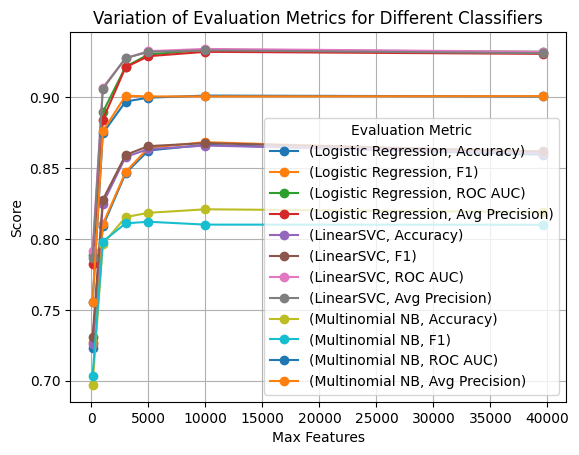

In [72]:
# Plot the DataFrame
df.plot(marker='o')
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.title('Variation of Evaluation Metrics for Different Classifiers')
plt.legend(title='Evaluation Metric')
plt.grid(True)
plt.show()

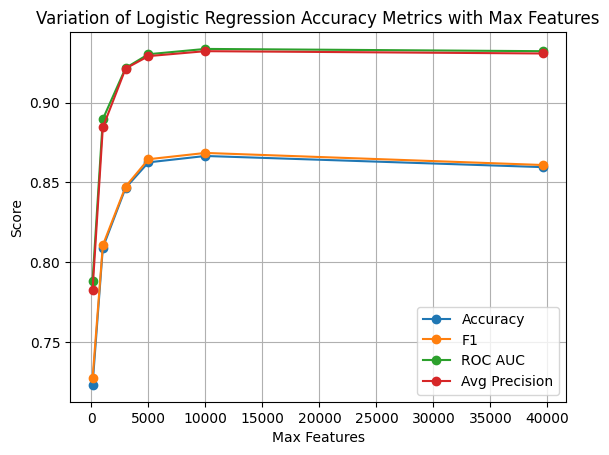

In [73]:
logistic_regression_data = df['Logistic Regression']
for metric in ['Accuracy', 'F1', 'ROC AUC', 'Avg Precision']:
    plt.plot(logistic_regression_data.index, logistic_regression_data[metric], label=metric,marker='o')
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.title('Variation of Logistic Regression Accuracy Metrics with Max Features')
#plt.xticks(range(len(df.index)), max_features_list)
plt.legend()
plt.grid(True)
plt.show()


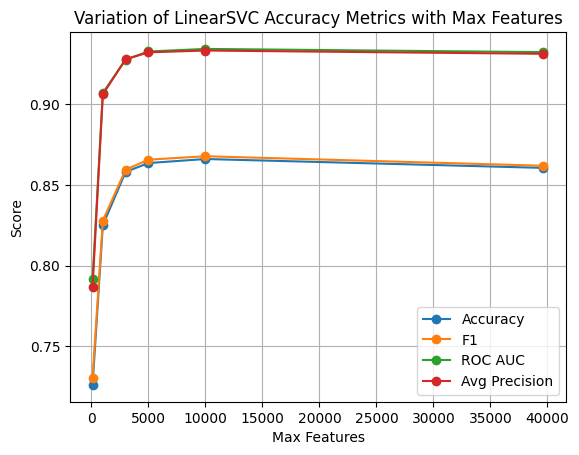

In [77]:
svc_data = df['LinearSVC']
for metric in ['Accuracy', 'F1', 'ROC AUC', 'Avg Precision']:
    plt.plot(svc_data.index, svc_data[metric], label=metric,marker='o')
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.title('Variation of LinearSVC Accuracy Metrics with Max Features')
#lt.xticks(range(len(df.index)), max_features_list)
plt.legend()
plt.grid(True)
plt.show()

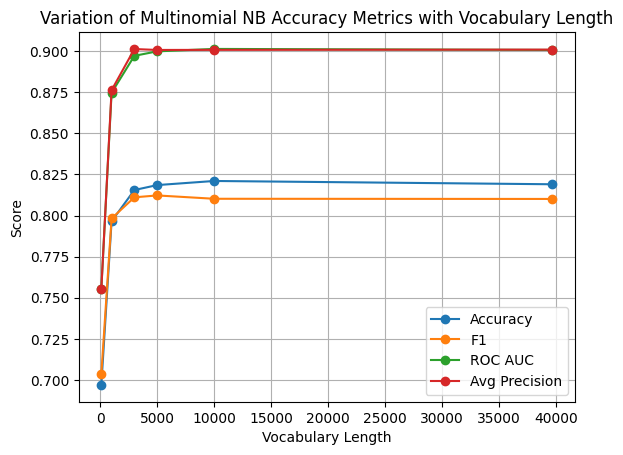

In [75]:
multinomial_data = df['Multinomial NB']
for metric in ['Accuracy', 'F1', 'ROC AUC', 'Avg Precision']:
    plt.plot(multinomial_data.index, multinomial_data[metric], label=metric,marker='o')
plt.xlabel('Vocabulary Length')
plt.ylabel('Score')
plt.title('Variation of Multinomial NB Accuracy Metrics with Vocabulary Length')
#plt.xticks(range(len(df.index)), max_features_list)
plt.legend()
plt.grid(True)
plt.show()

**comparaison des durées**

In [69]:
#il faut changer toutes les fonction afin d'envoyer la durée donc voici les durées extraites
durations = [
    [0.9715800285339355, 0.9895877838134766, 0.8769996166229248],
    [1.4561583995819092, 1.1812958717346191, 0.9959983825683594],
    [2.2609152793884277, 1.2938144207000732, 1.1350064277648926],
    [1.5994572639465332, 1.2529544830322266, 0.9749917984008789],
    [1.758985996246338, 1.5459613800048828, 1.0319857597351074],
    [1.9739978313446045, 1.8548102378845215, 0.9769985675811768]
]

columns = ['Logistic Regression', 'SVM', 'MultinomialNB'] 

df_time = pd.DataFrame(durations,columns=columns)
df_time

,Logistic Regression,SVM,MultinomialNB
0,0.971580,0.989588,0.877000
1,1.456158,1.181296,0.995998
2,2.260915,1.293814,1.135006
3,1.599457,1.252954,0.974992
4,1.758986,1.545961,1.031986
5,1.973998,1.854810,0.976999


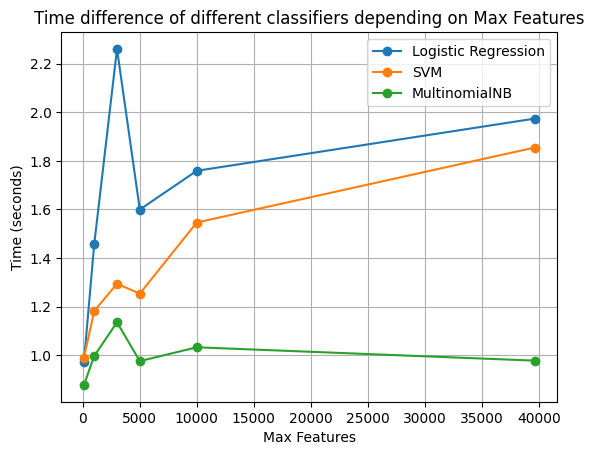

In [76]:
for i,metric in enumerate(df_time.columns):
        x_values = max_features_list
        y_values = df_time[metric]
        plt.plot(x_values, y_values, label=f'{metric}',marker='o')

plt.xlabel('Max Features')
plt.ylabel('Time (seconds)')
plt.title('Time difference of different classifiers depending on Max Features')
plt.legend()
plt.grid(True)
plt.show()

### Mise en place de la validation croisée au lieu de train-test-split

In [6]:
vect_params_tf, vect_params_svm = {},{}
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
preprocessor = lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
res_tous = comparaison_evaluation_single(preprocessor,TfidfVectorizer,vect_params_tf,model_params_LR,model_params_SVM,eval_func=eval_crossval)
print("______________________")


Comparaison des modèles : type
LOGISTIC REGRESSION
Résultats 
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8600 	0.8612 	0.9321 	0.9308
_____________________________________________

SVM 
Résultats
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8600 	0.8611 	0.9321 	0.9311
_____________________________________________

 MultinomialNB 
Résultats
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8200 	0.8115 	0.9008 	0.9010
______________________________________________________
Taux d'accuracy de LinReg contre LinSVM : 0.5
Taux d'accuracy de LinReg contre Multinom : 1.0
______________________


In [7]:
res_tous

[(0.86, 0.8612487611496531, 0.93211, 0.9308077597545967),
 (0.86, 0.8611111111111112, 0.932135, 0.931117042809138),
 (0.82, 0.8115183246073299, 0.900795, 0.901006973837914)]

In [8]:
classifiers = ['Logistic Regression', 'LinearSVC', 'Multinomial NB']
accuracy_tuples = ['Accuracy', 'F1', 'ROC AUC', 'Avg Precision']
columns = pd.MultiIndex.from_product([classifiers, accuracy_tuples])
df_cv = pd.DataFrame(res_tous)
df_cv.index = classifiers
df_cv.columns = accuracy_tuples
df_cv

,Accuracy,F1,ROC AUC,Avg Precision
Logistic Regression,0.86,0.861249,0.932110,0.930808
LinearSVC,0.86,0.861111,0.932135,0.931117
Multinomial NB,0.82,0.811518,0.900795,0.901007


Resultats cross validation
Best k =  9
Acc	F1	ROC-AUC	AP:
0.8670 	0.8678 	0.9356 	0.9348


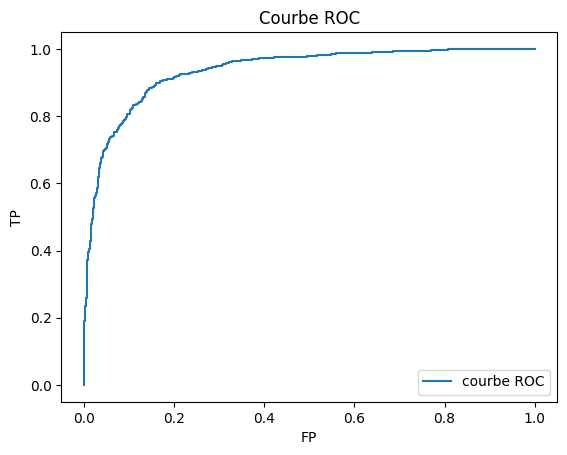

______________________


In [10]:
vect_params = {}
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
preprocessor = lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
liste_k = [i for i in range(2,21)]

best_k,res,tous =comparaison_crossval(preprocessor,TfidfVectorizer,vect_params,LogisticRegression,model_params_LR,graphe=True,cvs=liste_k)
print("______________________")


In [29]:
k_res = pd.DataFrame(tous,columns=['Acc', 'F1', 'ROC-AUC', 'AP'])
k_res.index = liste_k
k_res

,Acc,F1,ROC-AUC,AP
2,0.8360,0.837624,0.912136,0.909796
3,0.8490,0.850495,0.923317,0.922840
4,0.8580,0.858987,0.928189,0.927202
5,0.8600,0.861249,0.932110,0.930808
6,0.8580,0.859127,0.934070,0.933575
7,0.8615,0.862667,0.933285,0.932806
8,0.8650,0.865672,0.935425,0.934156
9,0.8670,0.867793,0.935645,0.934803
10,0.8625,0.862980,0.935138,0.934952
11,0.8615,0.861983,0.936598,0.936461


In [71]:
def plot_evaluation_metrics(results_data, k_list):
    colors = ['b', 'g', 'r', 'c']
    for i,metric in enumerate(results_data.columns):
        x_values = k_list
        y_values = results_data[metric]
        plt.plot(x_values, y_values, label=f'{metric}', color=colors[i])

    plt.xlabel('Value of k in Cross-Validation')
    plt.ylabel('k')
    plt.title('Evaluation Metrics for Different Values of k in Cross-Validation')
    plt.legend()
    plt.grid(True)
    plt.show()

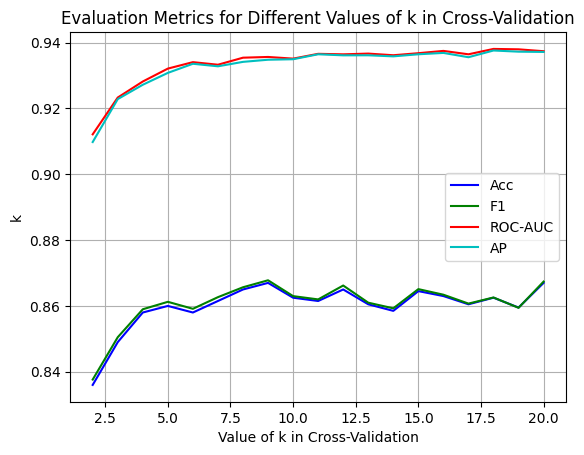

In [35]:
plot_evaluation_metrics(k_res,liste_k)

Resultats cross validation
Best k =  18
Acc	F1	ROC-AUC	AP:
0.8670 	0.8671 	0.9380 	0.9376


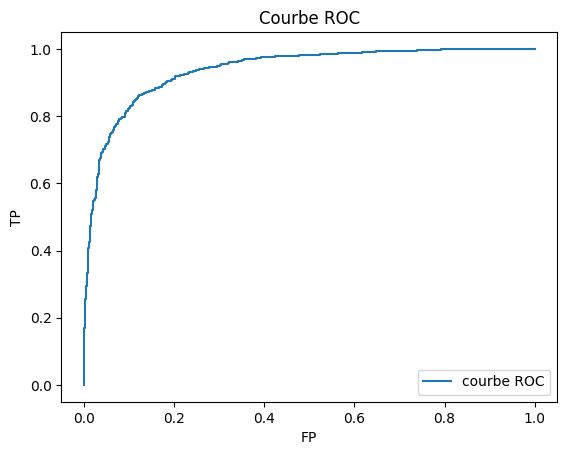

______________________


,Acc,F1,ROC-AUC,AP
2,0.8335,0.835067,0.910969,0.909077
4,0.8585,0.859274,0.927803,0.926867
6,0.8605,0.861950,0.933468,0.932968
8,0.8655,0.866103,0.935022,0.933984
10,0.8640,0.864811,0.934973,0.934889
12,0.8650,0.865672,0.936171,0.936006
14,0.8580,0.858706,0.936038,0.935833
16,0.8640,0.864271,0.937435,0.937028
18,0.8670,0.867133,0.937953,0.937620
20,0.8650,0.865269,0.937378,0.937286


In [8]:
liste_k2 = [i for i in range(2,41,2)]
vect_params = {}
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
preprocessor = lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
best_k2,res2,tous2 = comparaison_crossval(preprocessor,TfidfVectorizer,vect_params,LinearSVC,model_params_SVM,graphe=True,cvs=liste_k2)
print("______________________")
k_res2 = pd.DataFrame(tous2,columns=['Acc', 'F1', 'ROC-AUC', 'AP'])
k_res2.index = liste_k2
k_res2

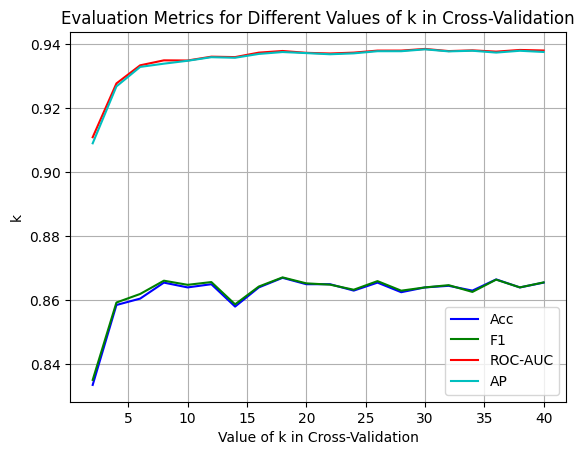

In [9]:
plot_evaluation_metrics(k_res2,liste_k2)


### quelques essaies pour trouver les paramètres de vectorizer utiles

In [3]:
best_k2 = 18

In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(alltxts)
vocabulary = vectorizer.vocabulary_
max_features_list = [100,500,1000,1500,3000,3500,4000,4500,5000,6000,10000,20000,len(vocabulary)]
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
vectorizer = TfidfVectorizer
preprocessor= lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
best_result = [0,0,0,0]
best_max = 0
resultats = []
for max_features in max_features_list:
    vect_params = {'max_features':max_features}
    res = eval_crossval(preprocessor,vectorizer,vect_params,model=LogisticRegression, model_params=model_params_LR,graphe=False,cv=best_k2)
    resultats.append(res)
    if accuracy_difference(res,best_result)[1] > 0.5:
        best_result = res
        best_max = max_features
print("Meilleur max_features",best_max)

Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.7240 	0.7278 	0.7879 	0.7837
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.7875 	0.7887 	0.8667 	0.8516
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8105 	0.8110 	0.8932 	0.8902
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8340 	0.8338 	0.9121 	0.9117
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8435 	0.8440 	0.9246 	0.9261
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8475 	0.8482 	0.9272 	0.9271
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8570 	0.8580 	0.9310 	0.9305
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8620 	0.8628 	0.9335 	0.9326
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8565 	0.8571 	0.9351 	0.9346
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8630 	0.8640 	0.9370 	0.9368
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8640 	0.8648 	0.9387 	0.9387
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8625 	0.8627 	0.9383 	0.9380
Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8615 	0.8616 	0.9382 	0.9376

Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8640 	0.8648 	0.9387 	0.9387


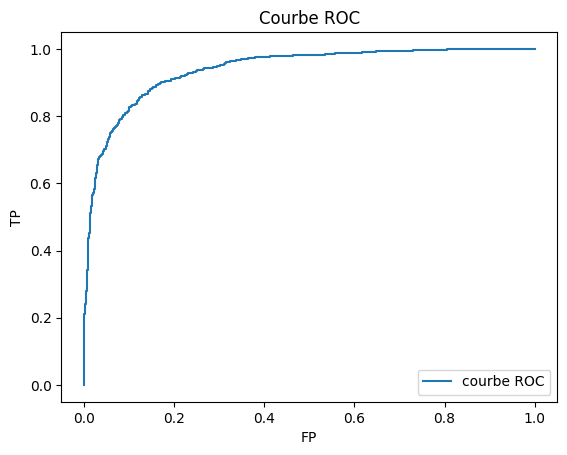

______________________


In [5]:
vect_params = {'max_features':best_max}
cv=best_k2
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
res = eval_crossval(preprocessor=preprocessor, vectorizer=TfidfVectorizer, vect_params=vect_params,
    model=LogisticRegression, model_params=model_params_LR,graphe=True,cv=best_k2)
print("______________________")


In [6]:
vect_params = {'max_features':best_max}
cv=best_k2
model_params_SVM = {'random_state': 0,'dual': False}
res = eval_crossval(preprocessor=preprocessor, vectorizer=TfidfVectorizer, vect_params=vect_params,
    model=LinearSVC, model_params=model_params_SVM,graphe=False,cv=best_k2)
print("______________________")


Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8655 	0.8662 	0.9392 	0.9392
______________________


In [10]:
eng_stop_words = stopwords.words('english')
#preprocessed_eng_stop_words = [stem(word) for word in eng_stop_words]
vect_params = {'stop_words':eng_stop_words}
cv=best_k2
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}

res = eval_crossval(preprocessor=preprocessor, vectorizer=TfidfVectorizer, vect_params=vect_params,
    model=LogisticRegression, model_params=model_params_LR,graphe=False,cv=best_k2)
print("______________________")


c:\Users\PC\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'arent', 'becaus', 'befor', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'dure', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'onc', 'onli', 'ourselv', 'shant', 'shes', 'shouldnt', 'shouldv', 'thatll', 'themselv', 'veri', 'wasnt', 'werent', 'whi', 'wont', 'wouldnt', 'youd', 'youll', 'yourselv', 'youv'] not in stop_words.
  warnings.warn(


Resultats cross validation
Acc	F1	ROC-AUC	AP:
0.8545 	0.8554 	0.9315 	0.9285
______________________


<b> Les résultats qu'on obtient avec la validation croisée sont plus effectives.

### stabilité de la validation croisée

In [12]:
vect_params = {}
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
preprocessor = lambda text: remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text))))
liste_k = [8,18]
liste_res = []
for random_state in [3,10,42,120,300] :
    print(random_state)
    liste_res.append(comparaison_crossval_grain(preprocessor,TfidfVectorizer,vect_params,LinearSVC,model_params_SVM,graphe=True,cvs=liste_k,random_state=random_state))
print("______________________")
print(liste_res)


3
Resultats cross validation
Best k =  18
Acc	F1	ROC-AUC	AP:
0.8686 	0.8692 	0.9387 	0.9384
10
Resultats cross validation
Best k =  18
Acc	F1	ROC-AUC	AP:
0.8698 	0.8705 	0.9363 	0.9369
42
Resultats cross validation
Best k =  18
Acc	F1	ROC-AUC	AP:
0.8677 	0.8683 	0.9373 	0.9373
120
Resultats cross validation
Best k =  18
Acc	F1	ROC-AUC	AP:
0.8692 	0.8699 	0.9381 	0.9375
300
Resultats cross validation
Best k =  18
Acc	F1	ROC-AUC	AP:
0.8756 	0.8759 	0.9370 	0.9356
______________________
[(18, [0.8686440677966102, 0.869198312236287, 0.9386603167193335, 0.9383600736793078]), (18, [0.8697723663313923, 0.8705263157894737, 0.9363274594206797, 0.9368653753369511]), (18, [0.8676548438327157, 0.8682824025289779, 0.9373027082772847, 0.9373091024465701]), (18, [0.8692429857067231, 0.8699315429173249, 0.9381423190745224, 0.9375275316446197]), (18, [0.8755955532027527, 0.8758584257791865, 0.9370258272800646, 0.9356297708413613])]


In [13]:
liste_res = [lst for k,lst in liste_res]
df_stabilite = pd.DataFrame(liste_res,columns=['Acc', 'F1', 'ROC-AUC', 'AP'])
df_stabilite.index = [3,10,42,120,300]
df_stabilite

,Acc,F1,ROC-AUC,AP
3,0.868644,0.869198,0.938660,0.938360
10,0.869772,0.870526,0.936327,0.936865
42,0.867655,0.868282,0.937303,0.937309
120,0.869243,0.869932,0.938142,0.937528
300,0.875596,0.875858,0.937026,0.935630


In [20]:
desc = df_stabilite.describe()
desc

,Acc,F1,ROC-AUC,AP
count,5.000000,5.000000,5.000000,5.000000
mean,0.870182,0.870759,0.937492,0.937138
std,0.003127,0.002971,0.000922,0.001003
min,0.867655,0.868282,0.936327,0.935630
25%,0.868644,0.869198,0.937026,0.936865
50%,0.869243,0.869932,0.937303,0.937309
75%,0.869772,0.870526,0.938142,0.937528
max,0.875596,0.875858,0.938660,0.938360


Les moyennes sont proches, les ecart-types sont petits donc elle est assez stable.